DEEP LEARNING ASSIGNMENT
-------------------------------
AUTHOR: EDSON N SILVA NETO

DESCRIPTION:
The task is to build an image classifier with Keras and Convolutional Neural
Networks for the Fashion MNIST dataset. This data set includes 10 labels of different 
clothing types with 28 by 28 grayscale images. There is a training set of 60,000 images 
and 10,000 test images.


In [38]:
# dowload the data from keras database
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Visualizing the dataset
-------------------------

In [39]:
import matplotlib.pyplot as plt 
%matplotlib inline

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


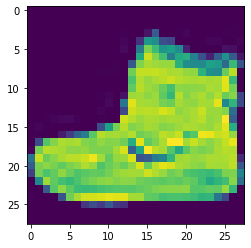

In [40]:
plt.imshow(x_train[0])

Preprocessing the data
----------------------
**Task 1: normalizing X train and X test.**

In [41]:
# max value is 255
x_train = x_train/255
x_test = x_test/255

In [42]:
print(x_train.min(),' - ' , x_train.max())
print(x_test.min(),' - ' , x_test.max())

0.0  -  1.0
0.0  -  1.0


**Task 2: Expading the arrays to include a 4th dimension (channel).**

In [43]:
x_train = x_train.reshape(60000, 28, 28,1)
x_test = x_test.reshape(10000, 28, 28, 1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Task 3: One-hot encoding the label sets.**

In [44]:
import numpy as np
from keras.utils import to_categorical

print(len(np.unique(np.array(y_test)))) # 10 classes

10


In [45]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [46]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Building the model
---------------------

In [47]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()

# CONV LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1)))

# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2,2)))

# FLATTEN LAYER
model.add(Flatten())

# DENSE LAYER
model.add(Dense(128))
model.add(Activation('relu'))

# DROPOUT LAYER
model.add(Dropout(0.3))

# FINAL DENSE LAYER
model.add(Dense(10))
model.add(Activation('softmax'))

# loss function, optimizer and metrics of avaluation
model.compile(loss='categorical_crossentropy', 
             optimizer='rmsprop',
             metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [49]:
results = model.fit(x_train, y_cat_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 33s 556us/step - loss: 0.4430 - accuracy: 0.8423
Epoch 2/10
60000/60000 [==============================] - 35s 577us/step - loss: 0.3203 - accuracy: 0.8870
Epoch 3/10
60000/60000 [==============================] - 34s 559us/step - loss: 0.2881 - accuracy: 0.8988
Epoch 4/10
60000/60000 [==============================] - 34s 562us/step - loss: 0.2691 - accuracy: 0.9054
Epoch 5/10
60000/60000 [==============================] - 34s 572us/step - loss: 0.2531 - accuracy: 0.9106
Epoch 6/10
60000/60000 [==============================] - 35s 577us/step - loss: 0.2414 - accuracy: 0.9154
Epoch 7/10
60000/60000 [==============================] - 35s 577us/step - loss: 0.2346 - accuracy: 0.9173
Epoch 8/10
60000/60000 [==============================] - 34s 573us/step - loss: 0.2254 - accuracy: 0.9219
Epoch 9/10
60000/60000 [==============================] - 34s 573us/step - loss: 0.2179 - accuracy: 0.9247
Epoch 10/10
60000/60000 [============

In [50]:
results.history['accuracy']

[0.8423167,
 0.88696665,
 0.8988,
 0.90545,
 0.9105833,
 0.91535,
 0.91735,
 0.92185,
 0.92475,
 0.92616665]

**Evolution of the precision across epochs**

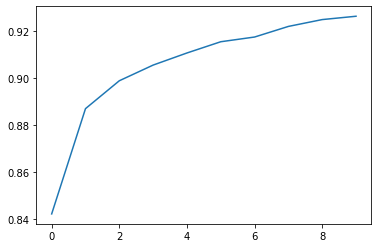

In [52]:
plt.plot(results.history['accuracy'])

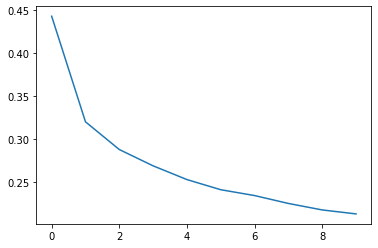

In [54]:
# evolution of the loss 
plt.plot(results.history['loss'])

**Evaluating the model on the test set**

In [55]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 2s 156us/step


[0.34818691848516464, 0.895799994468689]

**Evaluating the accuracy, precision, recall and f1-score**

In [56]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)
predictions

array([9, 2, 1, ..., 8, 1, 5])

In [57]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [58]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.84      0.84      1000
           3       0.85      0.93      0.89      1000
           4       0.78      0.89      0.83      1000
           5       0.99      0.96      0.97      1000
           6       0.86      0.59      0.70      1000
           7       0.91      0.99      0.95      1000
           8       0.99      0.95      0.97      1000
           9       0.98      0.93      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000

